In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\ML Projects\Heart_Disease_Prediction.csv")#Inside the bracket should be the location of your dataset in your local computer 
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
 print(df.isnull().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


# Correlation

<AxesSubplot:>

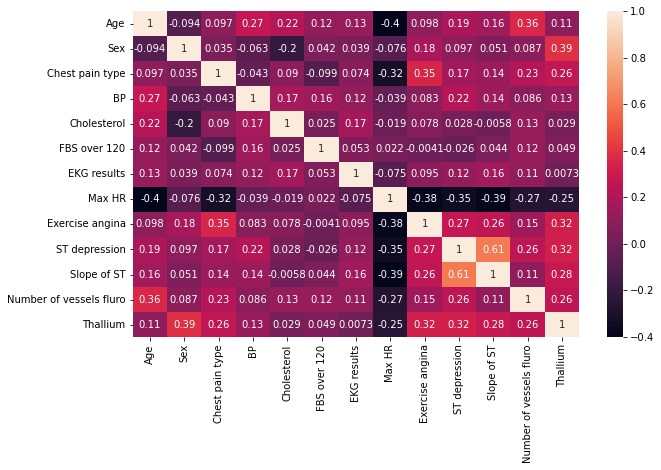

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot =True)

# Mapping Target Value to Numerical Data

In [7]:
from sklearn.preprocessing import LabelEncoder
le_type = LabelEncoder()
le_type.fit(['Presence' ,'Absence'])
df['Heart Disease'] = le_type.transform(df['Heart Disease'])

# Feature Selection

In [8]:
X = df.drop(['Heart Disease'],axis=1)
X = X.drop(['Max HR'],axis=1)
y= df['Heart Disease']


In [9]:
df['Heart Disease']

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int32

# Splitting the Data


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

# Normalization of data

In [11]:
from sklearn.preprocessing import StandardScaler


# after split your data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# initialize StandardScaler
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train)

# transform both training and testing data using the fitted scaler
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# Decision tree & KNN Algorithms 

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# assuming X_train_norm, X_test_norm, y_train, and y_test are defined from the previous code
# initialize a decision tree classifier with max depth 7
tree_clf = DecisionTreeClassifier(max_depth=7)

# fit the decision tree on the normalized training data
tree_clf.fit(X_train_norm, y_train)

# predict the target values for the test data
tree_y_pred = tree_clf.predict(X_test_norm)

# evaluate the accuracy of the decision tree classifier
tree_acc = accuracy_score(y_test, tree_y_pred)
print(f"Decision Tree Accuracy: {tree_acc:.3f}")

# initialize a KNN classifier with 11 neighbors
knn_clf = KNeighborsClassifier(n_neighbors=11)

# fit the KNN classifier on the normalized training data
knn_clf.fit(X_train_norm, y_train)

# predict the target values for the test data
knn_y_pred = knn_clf.predict(X_test_norm)

# evaluate the accuracy of the KNN classifier
knn_acc = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_acc:.3f}")


Decision Tree Accuracy: 0.741
KNN Accuracy: 0.765


# Data Visualisation

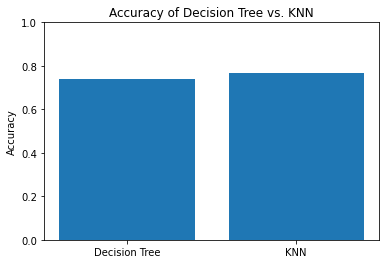

In [16]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
labels = ['Decision Tree', 'KNN']
accuracy_scores = [tree_acc, knn_acc]
ax.bar(labels, accuracy_scores)
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])
ax.set_title('Accuracy of Decision Tree vs. KNN')
plt.show()

# Hyper Parameter Tuning

In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

# perform grid search for decision tree hyperparameters
tree_param_grid = {'max_depth': [3, 5, 7, 9, None]}
tree_grid_search = GridSearchCV(DecisionTreeClassifier(), tree_param_grid, cv=5)
tree_grid_search.fit(X_train_norm, y_train)
print(f"Best Decision Tree Params: {tree_grid_search.best_params_}")

# perform grid search for KNN hyperparameters
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid_search.fit(X_train_norm, y_train)
print(f"Best KNN Params: {knn_grid_search.best_params_}")

# initialize a voting classifier with the best decision tree and KNN hyperparameters
tree_clf = DecisionTreeClassifier(max_depth=tree_grid_search.best_params_['max_depth'])
knn_clf = KNeighborsClassifier(n_neighbors=knn_grid_search.best_params_['n_neighbors'])
voting_clf = VotingClassifier(estimators=[('tree', tree_clf), ('knn', knn_clf)])

# fit the voting classifier on the normalized training data
voting_clf.fit(X_train_norm, y_train)

# predict the target values for the test data using the voting classifier
ensemble_y_pred = voting_clf.predict(X_test_norm)

# evaluate the accuracy of the voting classifier
ensemble_acc = accuracy_score(y_test, ensemble_y_pred)
print(f"Ensemble Accuracy: {ensemble_acc:.3f}")


Best Decision Tree Params: {'max_depth': 7}
Best KNN Params: {'n_neighbors': 11}
Ensemble Accuracy: 0.716
